In [ ]:
#!ls "/content/drive/My Drive"

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

In [ ]:
data = pd.read_csv('/content/drive/My Drive/creditcard.csv')
data = data.drop(['Time'] , axis=1)

In [ ]:
data.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [ ]:
y_true=data['Class']
df_data=data.drop('Class',1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_data, y_true, test_size=0.4, random_state=42)

In [ ]:
## Not required for Isolation Forest
def preprocess(df_data):
    for col in df_data:
        df_data[col]=(df_data[col]-np.min(df_data[col]))/(np.max(df_data[col])-np.min(df_data[col]))
    return

In [ ]:
## Not valid for LOF
def train(X,clf,ensembleSize=5,sampleSize=10000):
    mdlLst=[]
    for n in range(ensembleSize):
        X=df_data.sample(sampleSize)
        clf.fit(X)
        mdlLst.append(clf)
    return mdlLst

In [ ]:
## Not valif for LOF
def predict(X,mdlLst):
    y_pred=np.zeros(X.shape[0])
    for clf in mdlLst:
        y_pred=np.add(y_pred,clf.decision_function(X).reshape(X.shape[0],))
    y_pred=(y_pred*1.0)/len(mdlLst)
    return y_pred

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

In [ ]:
alg=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.01, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0,behaviour="new")

In [ ]:
if_mdlLst=train(X_train,alg)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You shoul

In [ ]:
%%timeit
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

1 loop, best of 3: 22.2 s per loop


In [ ]:
if_y_pred=predict(X_test,if_mdlLst)
if_y_pred=1-if_y_pred

#Creating class labels based on decision function
if_y_pred_class=if_y_pred.copy()
if_y_pred_class[if_y_pred>=np.percentile(if_y_pred,95)]=1
if_y_pred_class[if_y_pred<np.percentile(if_y_pred,95)]=0

In [ ]:
roc_auc_score(y_test, if_y_pred_class)


0.902372446071899

In [ ]:
if_cm=confusion_matrix(y_test, if_y_pred_class)

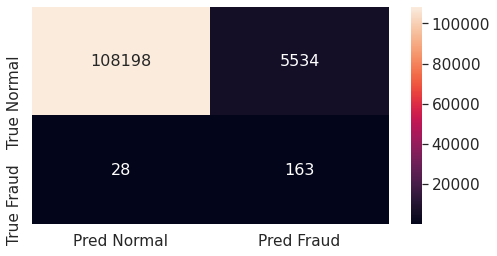

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt   
df_cm = pd.DataFrame(if_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [ ]:
precision_recall_fscore_support(y_test, if_y_pred_class, average='weighted')

(0.9981131141688346, 0.9511775497485143, 0.9733994733772409, None)

In [ ]:
!pip install eif

     |████████████████████████████████| 1.6MB 7.9MB/s 
  Created wheel for eif: filename=eif-2.0.2-cp36-cp36m-linux_x86_64.whl size=251095 sha256=ff986a143dafec938fdf343a38c9c6416e24ffb460cebc679245cd961b10fb8b
  Stored in directory: /root/.cache/pip/wheels/24/ff/c3/6a610ba4a6c8e968483ba15a0e38feacd7c0a26c932b2f91bd
Successfully built eif


In [ ]:
import eif as iso ## importing extended Isolation Forest


In [ ]:
X_train1=np.array(X_train)
X_test1=np.array(X_test)

In [ ]:
F1 = iso.iForest(X_train1,ntrees=100, sample_size=512, ExtensionLevel=1)

In [ ]:
pred=F1.compute_paths(X_test1)

In [ ]:
pred_class=np.where(pred>0.467,1,0)

In [ ]:
eif_cm=confusion_matrix(y_test,pred_class)

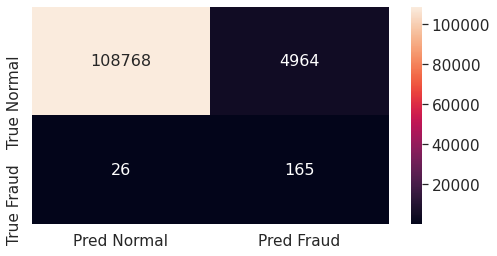

In [ ]:
df_cm = pd.DataFrame(eif_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [ ]:
precision_recall_fscore_support(y_test, pred_class, average='weighted')

(0.998138781201012, 0.9561984849415833, 0.9760406768983134, None)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf=rf.predict(X_test)

In [ ]:
rf_cm=confusion_matrix(y_test, pred_rf)

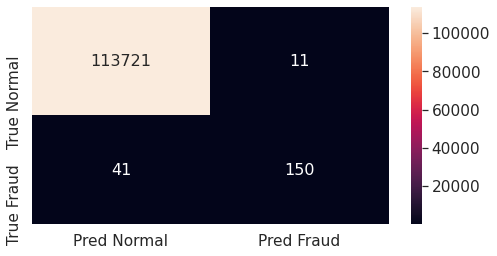

In [ ]:
df_cm = pd.DataFrame(rf_cm,
                  ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
plt.figure(figsize = (8,4))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

In [ ]:
precision_recall_fscore_support(y_test, pred_rf, average='weighted')

(0.9995256543683471, 0.9995435513460846, 0.9995241305054374, None)